In [1]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib inline

In [2]:
G_train = nx.read_edgelist('t3-train.txt', create_using=nx.DiGraph(), nodetype=int, edgetype=int)
unG_train = nx.read_edgelist('t3-train.txt', create_using=nx.Graph(), nodetype=int, edgetype=int)
print(len(G_train.edges), 'edges')
print(len(G_train.nodes), 'nodes')

86381 edges
12480 nodes


In [3]:
G_test = nx.read_edgelist('t3-test.txt', create_using=nx.DiGraph(), nodetype=int, edgetype=int)
unG_test = nx.read_edgelist('t3-test.txt', create_using=nx.Graph(), nodetype=int, edgetype=int)
print(len(G_test.edges), 'edges')
print(len(G_test.nodes), 'nodes')

test_x = []
for fromId, toId in np.loadtxt('t3-test.txt'):
    test_x.append((fromId,  toId))
test_x = np.array(test_x).astype('int64')

74798 edges
10563 nodes


In [4]:
with open('nodeMeta.pkl', 'rb') as f:
    nodeMeta = pickle.load(f)

In [5]:
node_list = np.array([i for i in nodeMeta])
date_list = np.array([nodeMeta[i]['date'] for i in nodeMeta])
sort_node = node_list[np.argsort(date_list)]
# early -> late

In [6]:
# check
n = 10
print(sort_node[:n])
for i in sort_node[:n]:
    print(nodeMeta[i]['date'])
print(sort_node[-n:])
for i in sort_node[-n:]:
    print(nodeMeta[i]['date'])

[ 7785  8874  7337 15926   416  1140  4936  7840 16436   240]
1992-01-02 00:00:00
1992-01-02 00:00:00
1992-01-02 00:00:00
1992-01-03 00:00:00
1992-01-06 17:16:14
1992-01-08 00:00:00
1992-01-08 00:00:00
1992-01-09 00:00:00
1992-01-09 00:00:00
1992-01-11 00:00:00
[ 4918 16494 10508  9532  3354  3995 11183 13598 15202  4966]
2018-06-28 09:19:42
2018-09-18 15:14:24
2018-09-18 23:32:28
2018-10-16 10:28:16
2018-10-16 10:28:59
2018-10-17 12:52:46
2018-11-08 22:23:00
2018-11-09 23:05:05
2018-12-23 11:28:33
2018-12-31 23:54:17


# time distrubution analysis

In [7]:
from_nodes = set()
to_nodes = set()
for edge in G_test.edges:
    h, t = edge
    from_nodes.add(h)
    to_nodes.add(t)
print(len(from_nodes), len(to_nodes))

3246 9213


In [8]:
timerank = dict()
for e, i in enumerate(sort_node):
    timerank[i] = e

In [9]:
%store timerank

Stored 'timerank' (dict)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b1953b6d8>]],
      dtype=object)

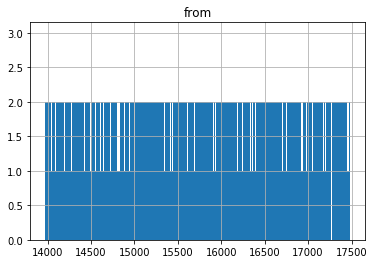

In [10]:
tmp = []
for i in from_nodes:
    tmp.append(timerank[i])
df = pd.DataFrame(data={'from':tmp})
df.hist(bins=1750)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b19610b00>]],
      dtype=object)

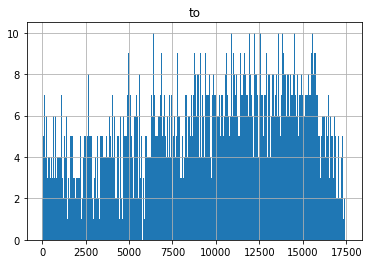

In [11]:
tmp = []
for i in to_nodes:
    tmp.append(timerank[i])
df = pd.DataFrame(data={'to':tmp})
df.hist(bins=1750)

* consistent in time series

# my sample

In [13]:
%store -r X2
%store -r Y2
%store -r timerank

In [14]:
from_nodes = set()
to_nodes = set()
for edge in X2:
    h, t = edge
    from_nodes.add(h)
    to_nodes.add(t)
print(len(from_nodes), len(to_nodes))

10679 9602


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b1bc3ab70>]],
      dtype=object)

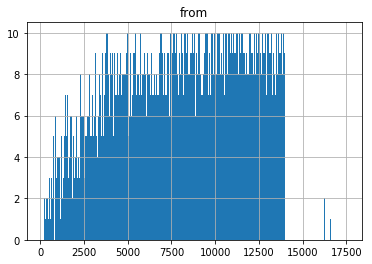

In [15]:
tmp = []
for i in from_nodes:
    tmp.append(timerank[i])
df = pd.DataFrame(data={'from':tmp})
df.hist(bins=1750)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b1b54f588>]],
      dtype=object)

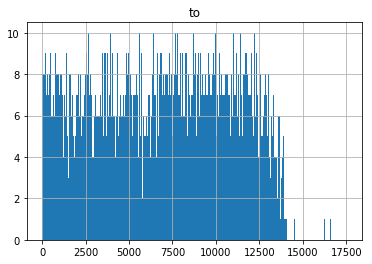

In [16]:
tmp = []
for i in to_nodes:
    tmp.append(timerank[i])
df = pd.DataFrame(data={'to':tmp})
df.hist(bins=1750)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b138aa358>]],
      dtype=object)

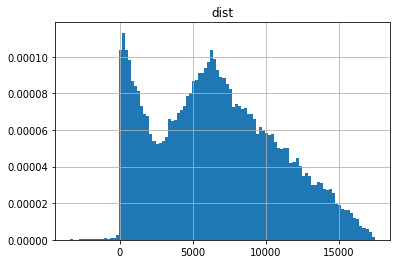

In [26]:
tmp = []
for edge in G_test.edges:
    h, t = edge
    tmp.append(timerank[h] - timerank[t])
df = pd.DataFrame(data={'dist':tmp})
df.hist(bins=100, density=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b13a28cf8>]],
      dtype=object)

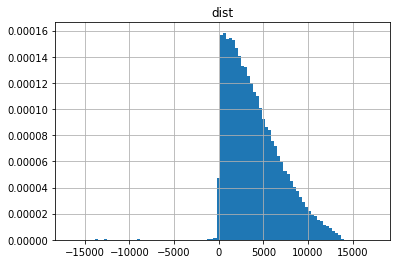

In [25]:
tmp = []
for edge in X2:
    h, t = edge
    tmp.append(timerank[h] - timerank[t])
df = pd.DataFrame(data={'dist':tmp})
df.hist(bins=100, density=True)